In [3]:
import numpy as np
import pandas as pd

In [4]:
df_weekday = pd.read_csv('../../data/bike_rental_history_weekday_sample.csv')

# create undirected route for the newman method
df_weekday.loc[:,'route_undirect'] = df_weekday.loc[:,['origin_station_id', 'desti_station_id']].apply(lambda x: f'{sorted(x)[0]}~{sorted(x)[1]}', axis=1)
df_weekday_undirected = df_weekday.groupby('route_undirect').size().reset_index().rename(columns={0: 'count'})
df_weekday_undirected.loc[:,'origin_id'] = df_weekday_undirected.loc[:,'route_undirect'].apply(lambda x: x.split('~')[0])
df_weekday_undirected.loc[:,'desti_id'] = df_weekday_undirected.loc[:,'route_undirect'].apply(lambda x: x.split('~')[1])
df_weekday_undirected = df_weekday_undirected.drop(columns=['route_undirect'])

## the travel between same station is not considered    
df_weekday_undirected = df_weekday_undirected.loc[df_weekday_undirected.loc[:,'origin_id'] != df_weekday_undirected.loc[:,'desti_id']]
df_weekday_undirected

,count,origin_id,desti_id
1,1,ST-1000,ST-1274
2,1,ST-1000,ST-1497
3,1,ST-1000,ST-1504
4,1,ST-1000,ST-1521
5,1,ST-1000,ST-1523
...,...,...,...
48456,8,ST-98,ST-99
48460,1,ST-993,ST-997
48462,2,ST-994,ST-996
48463,11,ST-994,ST-997


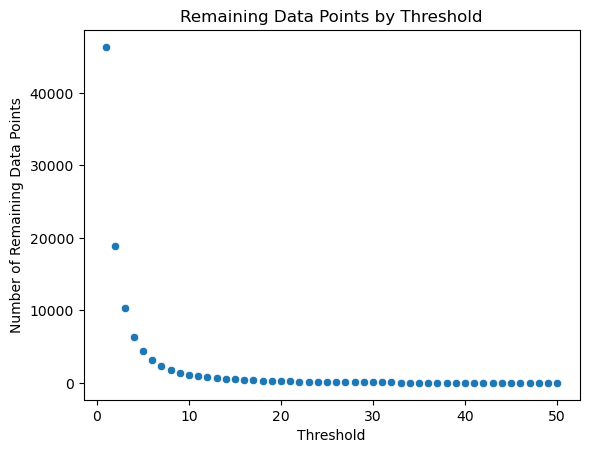

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

thresholds = range(1, 51)
remaining_data = []

for threshold in thresholds:
    filtered_df = df_weekday_undirected[df_weekday_undirected['count'] >= threshold]
    remaining_data.append(len(filtered_df))

sns.scatterplot(x=thresholds, y=remaining_data)
plt.xlabel('Threshold')
plt.ylabel('Number of Remaining Data Points')
plt.title('Remaining Data Points by Threshold')
plt.show()

In [6]:
import networkx as nx
from networkx.algorithms.community import louvain_partitions

G = nx.from_pandas_edgelist(df_weekday_undirected.loc[df_weekday_undirected.loc[:,'count']>10], source='origin_id', target='desti_id', edge_attr='count')
partition = list(louvain_partitions(G, weight='count', resolution=1))


Community 1: 4 stations
Community 2: 2 stations
Community 3: 7 stations
Community 4: 3 stations
Community 5: 3 stations
Community 6: 2 stations
Community 7: 2 stations
Community 8: 5 stations
Community 9: 25 stations
Community 10: 4 stations
Community 11: 2 stations
Community 12: 3 stations
Community 13: 6 stations
Community 14: 2 stations
Community 15: 5 stations
Community 16: 17 stations
Community 17: 2 stations
Community 18: 6 stations
Community 19: 13 stations
Community 20: 2 stations
Community 21: 7 stations
Community 22: 6 stations
Community 23: 2 stations
Community 24: 2 stations
Community 25: 5 stations
Community 26: 11 stations
Community 27: 23 stations
Community 28: 7 stations
Community 29: 2 stations
Community 30: 13 stations
Community 31: 6 stations
Community 32: 3 stations
Community 33: 30 stations
Community 34: 19 stations
Community 35: 2 stations
Community 36: 10 stations
Community 37: 2 stations
Community 38: 10 stations
Community 39: 11 stations
Community 40: 2 station

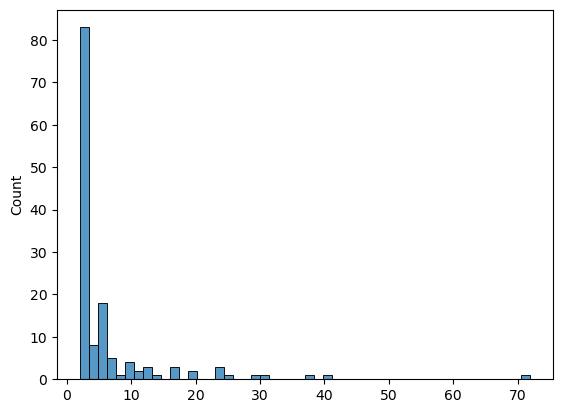

In [7]:
for i, c in enumerate(partition[2]):
    print(f'Community {i+1}: {len(c)} stations')

# draw histogram of community size
community_sizes = [len(c) for c in partition[2]]
sns.histplot(community_sizes, bins=50)

# sort the community by edge count
def community_edge_count(c):
    edge_count = 0
    for i in range(len(c)):
        for j in range(i+1, len(c)):
            if G.has_edge(c[i], c[j]):
                edge_count += G[c[i]][c[j]]['count']
    return edge_count

sorted_partition = sorted([list(c) for c in partition[2]], key=community_edge_count, reverse=True)

In [8]:
for i, c in enumerate(sorted_partition):
    print(f'Community {i+1}: {len(c)} stations, {community_edge_count(c)} edges')

Community 1: 72 stations, 2691 edges
Community 2: 41 stations, 1028 edges
Community 3: 37 stations, 960 edges
Community 4: 30 stations, 720 edges
Community 5: 29 stations, 712 edges
Community 6: 23 stations, 688 edges
Community 7: 24 stations, 641 edges
Community 8: 25 stations, 528 edges
Community 9: 24 stations, 520 edges
Community 10: 19 stations, 399 edges
Community 11: 20 stations, 380 edges
Community 12: 14 stations, 330 edges
Community 13: 16 stations, 315 edges
Community 14: 16 stations, 310 edges
Community 15: 13 stations, 306 edges
Community 16: 11 stations, 294 edges
Community 17: 13 stations, 293 edges
Community 18: 11 stations, 271 edges
Community 19: 13 stations, 227 edges
Community 20: 17 stations, 224 edges
Community 21: 10 stations, 199 edges
Community 22: 7 stations, 167 edges
Community 23: 10 stations, 158 edges
Community 24: 10 stations, 157 edges
Community 25: 10 stations, 141 edges
Community 26: 6 stations, 139 edges
Community 27: 7 stations, 129 edges
Community 2

In [9]:
df_weekday

,birth_year,gender,user_type,origin_station_id,desti_station_id,rent_hour,return_hour,rent_minute_of_day,return_minute_of_day,route_undirect
0,2000,\N,내국인,ST-110,ST-96,17,17,1035,1051,ST-110~ST-96
1,2001,M,내국인,ST-2892,ST-1650,12,12,749,763,ST-1650~ST-2892
2,1984,\N,내국인,ST-1868,ST-1859,9,9,540,547,ST-1859~ST-1868
3,1977,\N,내국인,ST-2571,ST-550,6,6,386,391,ST-2571~ST-550
4,1967,F,내국인,ST-564,ST-655,14,14,860,871,ST-564~ST-655
...,...,...,...,...,...,...,...,...,...,...
111003,1995,\N,내국인,ST-2718,ST-606,12,12,760,763,ST-2718~ST-606
111004,1965,\N,내국인,ST-600,ST-913,9,9,567,572,ST-600~ST-913
111005,1990,F,내국인,ST-2011,ST-312,18,18,1083,1087,ST-2011~ST-312
111006,1998,\N,내국인,ST-2314,ST-1663,0,0,38,42,ST-1663~ST-2314


In [10]:
for i, c in enumerate(sorted_partition[:20]):
    df_weekday_tmp = df_weekday.drop('route_undirect', axis=1).loc[df_weekday.loc[:,'origin_station_id'].isin(c), :]
    df_weekday_tmp = df_weekday_tmp.loc[df_weekday_tmp.loc[:,'desti_station_id'].isin(c), :]
    df_weekday_tmp.to_csv(f'../../data/bike_rental_history/communities/weekday/{i}.csv', index=False)

In [11]:
## make a dataframe for the station id and community id

df_community = pd.DataFrame(columns=['station_id', 'community_id'])
for i, c in enumerate(sorted_partition):
    df_community = df_community.append(pd.DataFrame({'station_id':c, 'community_id':i}))

df_community.to_csv('../../data/bike_rental_history/communities/weekday/station/station_community.csv', index=False)

C:\Users\seung\AppData\Local\Temp\ipykernel_25076\1726560355.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_community = df_community.append(pd.DataFrame({'station_id':c, 'community_id':i}))
C:\Users\seung\AppData\Local\Temp\ipykernel_25076\1726560355.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_community = df_community.append(pd.DataFrame({'station_id':c, 'community_id':i}))
C:\Users\seung\AppData\Local\Temp\ipykernel_25076\1726560355.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_community = df_community.append(pd.DataFrame({'station_id':c, 'community_id':i}))
C:\Users\seung\AppData\Local\Temp\ipykernel_25076\1726560355.py:5: FutureWarning: The frame.append method is deprecated and will be removed